In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('conventional_weather_stations_inmet_brazil_1961_2019.csv', sep=';')

In [3]:
df = df.drop('Unnamed: 19', axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12251335 entries, 0 to 12251334
Data columns (total 19 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Estacao                    int64  
 1   Data                       object 
 2   Hora                       int64  
 3   Precipitacao               float64
 4   TempBulboSeco              float64
 5   TempBulboUmido             float64
 6   TempMaxima                 float64
 7   TempMinima                 float64
 8   UmidadeRelativa            float64
 9   PressaoAtmEstacao          float64
 10  PressaoAtmMar              float64
 11  DirecaoVento               float64
 12  VelocidadeVento            float64
 13  Insolacao                  float64
 14  Nebulosidade               float64
 15  Evaporacao Piche           float64
 16  Temp Comp Media            float64
 17  Umidade Relativa Media     float64
 18  Velocidade do Vento Media  float64
dtypes: float64(16), int64(2), object(1)
memo

In [5]:
df['Data']= pd.to_datetime(df['Data'],format='%d/%m/%Y')

In [6]:
df['Ano']= df['Data'].dt.year
df['Mes']= df['Data'].dt.month
df['Dia']= df['Data'].dt.day

In [7]:
df2000 = df.query('Ano >= 2000')
df2000.head()

,Estacao,Data,Hora,Precipitacao,TempBulboSeco,TempBulboUmido,TempMaxima,TempMinima,UmidadeRelativa,PressaoAtmEstacao,...,VelocidadeVento,Insolacao,Nebulosidade,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Ano,Mes,Dia
27312,82024,2000-01-01,0,NaN,28.8,24.6,32.4,NaN,70.0,NaN,...,3.0,2.6,0.0,7.5,27.96,73.50,3.333333,2000,1,1
27313,82024,2000-01-01,1200,0.0,25.4,22.6,NaN,24.0,78.0,NaN,...,4.0,NaN,8.0,NaN,NaN,NaN,NaN,2000,1,1
27314,82024,2000-01-01,1800,NaN,32.2,24.6,NaN,NaN,52.0,NaN,...,4.0,NaN,7.0,NaN,NaN,NaN,NaN,2000,1,1
27315,82024,2000-01-02,0,NaN,29.0,26.6,33.0,NaN,82.0,NaN,...,2.0,4.7,0.0,7.0,27.84,74.75,2.333333,2000,1,2
27316,82024,2000-01-02,1200,0.0,26.6,23.6,NaN,24.0,77.0,NaN,...,2.0,NaN,4.0,NaN,NaN,NaN,NaN,2000,1,2


In [8]:
df2000.columns

Index(['Estacao', 'Data', 'Hora', 'Precipitacao', 'TempBulboSeco',
       'TempBulboUmido', 'TempMaxima', 'TempMinima', 'UmidadeRelativa',
       'PressaoAtmEstacao', 'PressaoAtmMar', 'DirecaoVento', 'VelocidadeVento',
       'Insolacao', 'Nebulosidade', 'Evaporacao Piche', 'Temp Comp Media',
       'Umidade Relativa Media', 'Velocidade do Vento Media', 'Ano', 'Mes',
       'Dia'],
      dtype='object')

In [9]:
# eu quero tirar todos os valores que são nulos da coluna de pressão at

mask = df2000['PressaoAtmEstacao'].isnull()
df2000_final = df2000.loc[~mask]
df2000_final

,Estacao,Data,Hora,Precipitacao,TempBulboSeco,TempBulboUmido,TempMaxima,TempMinima,UmidadeRelativa,PressaoAtmEstacao,...,VelocidadeVento,Insolacao,Nebulosidade,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Ano,Mes,Dia
27913,82024,2000-07-19,1800,NaN,32.0,26.2,NaN,NaN,62.0,1004.6,...,2.00000,NaN,9.00,NaN,NaN,NaN,NaN,2000,7,19
27914,82024,2000-07-20,0,NaN,23.4,22.6,35.0,NaN,93.0,1003.3,...,3.00000,9.3,10.00,3.0,27.94,75.75,1.133333,2000,7,20
27915,82024,2000-07-20,1200,0.8,24.2,24.2,NaN,22.5,100.0,1007.0,...,1.40000,NaN,10.00,NaN,NaN,NaN,NaN,2000,7,20
27916,82024,2000-07-20,1800,NaN,30.5,25.7,NaN,NaN,67.0,1005.3,...,2.00000,NaN,10.00,NaN,NaN,NaN,NaN,2000,7,20
27917,82024,2000-07-21,0,NaN,29.0,24.5,32.2,NaN,68.0,1002.3,...,0.00000,NaN,10.00,3.7,27.30,85.00,1.333333,2000,7,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12251330,83379,2019-12-30,1200,0.0,24.2,NaN,NaN,21.1,66.0,909.0,...,1.02888,NaN,7.50,NaN,NaN,NaN,NaN,2019,12,30
12251331,83379,2019-12-30,1800,NaN,29.7,NaN,NaN,NaN,46.0,905.4,...,1.02888,NaN,7.50,NaN,NaN,NaN,NaN,2019,12,30
12251332,83379,2019-12-31,0,NaN,26.6,NaN,31.6,NaN,55.0,905.5,...,1.02888,6.0,0.00,NaN,25.28,58.75,0.000000,2019,12,31
12251333,83379,2019-12-31,1200,0.0,26.9,NaN,NaN,21.3,54.0,908.6,...,0.00000,NaN,8.75,NaN,NaN,NaN,NaN,2019,12,31


A PARTIR DAQUI SÓ TRABALHO COM DADOS DE 2000 PARA FRENTE

In [10]:
df2k = df2000_final

In [11]:
mask = df2k['TempBulboSeco'].isnull()
df2k = df2k.loc[~mask]

In [12]:
df2k_1 = df2k.loc[0:100000]

<Figure size 720x720 with 0 Axes>

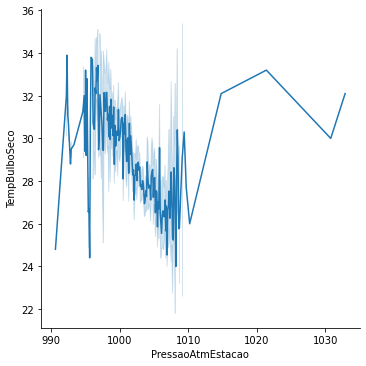

In [13]:
plt.figure(figsize=(10,10))
import seaborn as sns
sns.relplot(data=df2k_1, x='PressaoAtmEstacao', y='TempBulboSeco', kind='line')
plt.show()

In [14]:
mask = df2k['Precipitacao'].isnull()
df2k = df2k.loc[~mask]
mask = df2k['Nebulosidade'].isnull()
df2k = df2k.loc[~mask]

In [15]:
df2k_1 = df2k.loc[0:100000]

<Figure size 720x720 with 0 Axes>

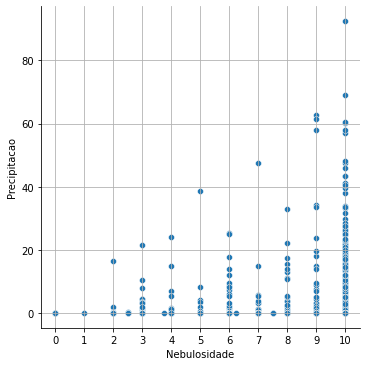

In [16]:
plt.figure(figsize=(10,10))
import seaborn as sns
sns.relplot(data=df2k_1, y='Precipitacao', x='Nebulosidade')
plt.grid()
plt.xticks(range(0,11,1))
plt.show()

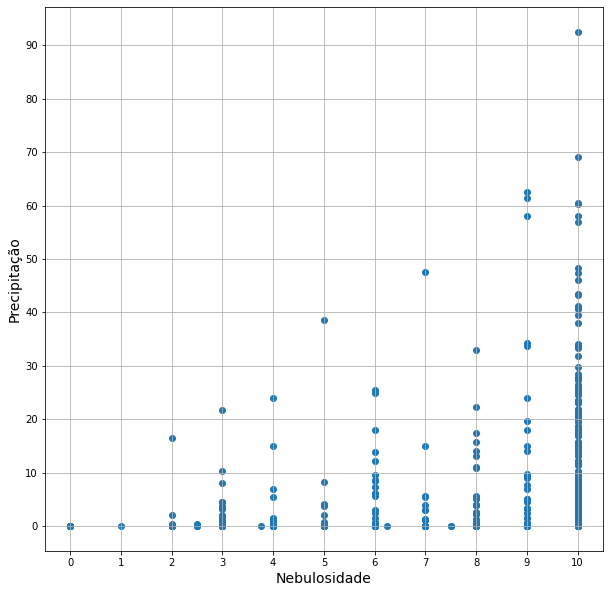

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(df2k_1['Nebulosidade'], df2k_1['Precipitacao'])
plt.xticks(range(0,11,1))
plt.yticks(range(0,100,10))
plt.ylabel('Precipitação', fontsize=14)
plt.xlabel('Nebulosidade', fontsize=14)
plt.grid()
plt.show()

In [18]:
mask = df2k['UmidadeRelativa'].isnull()
df2k = df2k.loc[~mask]
mask = df2k['UmidadeRelativa'].isnull()
df2k = df2k.loc[~mask]

In [19]:
df2k.columns

Index(['Estacao', 'Data', 'Hora', 'Precipitacao', 'TempBulboSeco',
       'TempBulboUmido', 'TempMaxima', 'TempMinima', 'UmidadeRelativa',
       'PressaoAtmEstacao', 'PressaoAtmMar', 'DirecaoVento', 'VelocidadeVento',
       'Insolacao', 'Nebulosidade', 'Evaporacao Piche', 'Temp Comp Media',
       'Umidade Relativa Media', 'Velocidade do Vento Media', 'Ano', 'Mes',
       'Dia'],
      dtype='object')

In [20]:
df_final = df2k[['Ano','Mes','Dia','Precipitacao', 'TempBulboSeco', 'UmidadeRelativa', 'PressaoAtmEstacao', 'Nebulosidade']]
df_final

,Ano,Mes,Dia,Precipitacao,TempBulboSeco,UmidadeRelativa,PressaoAtmEstacao,Nebulosidade
27915,2000,7,20,0.8,24.2,100.0,1007.0,10.00
27918,2000,7,21,0.9,25.0,93.0,1005.2,3.00
27921,2000,7,22,0.4,27.0,84.0,1006.8,6.00
27924,2000,7,23,4.6,26.8,80.0,1006.2,3.00
27927,2000,7,24,1.2,26.6,81.0,1002.8,10.00
...,...,...,...,...,...,...,...,...
12251321,2019,12,27,0.0,25.6,66.0,911.8,3.75
12251324,2019,12,28,0.0,25.3,59.0,911.5,7.50
12251327,2019,12,29,0.0,25.6,57.0,909.8,3.75
12251330,2019,12,30,0.0,24.2,66.0,909.0,7.50


In [21]:
df_p = df_final.loc[df_final['Precipitacao'] != 0]
df_p = df_p.loc[df_p['Nebulosidade'] != 0 ]
df_p

,Ano,Mes,Dia,Precipitacao,TempBulboSeco,UmidadeRelativa,PressaoAtmEstacao,Nebulosidade
27915,2000,7,20,0.8,24.2,100.0,1007.0,10.00
27918,2000,7,21,0.9,25.0,93.0,1005.2,3.00
27921,2000,7,22,0.4,27.0,84.0,1006.8,6.00
27924,2000,7,23,4.6,26.8,80.0,1006.2,3.00
27927,2000,7,24,1.2,26.6,81.0,1002.8,10.00
...,...,...,...,...,...,...,...,...
12251297,2019,12,19,11.2,20.6,93.0,912.3,8.75
12251300,2019,12,20,2.3,24.8,72.0,911.2,7.50
12251309,2019,12,23,4.2,22.3,82.0,911.0,7.50
12251312,2019,12,24,21.3,21.2,86.0,911.2,10.00


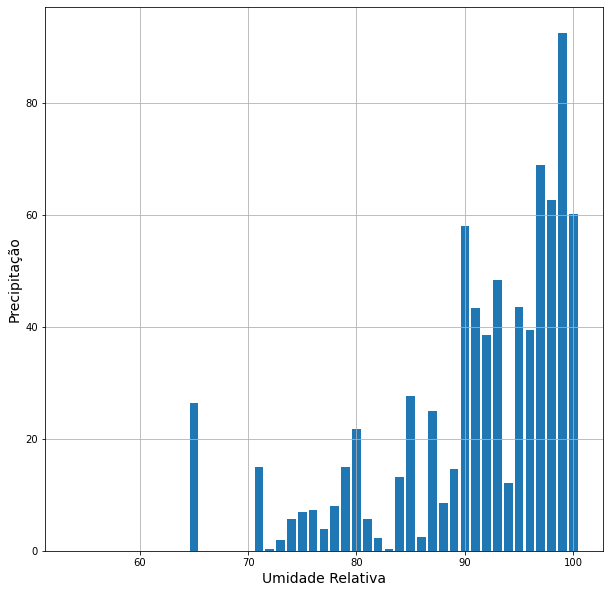

In [22]:
plt.figure(figsize=(10,10))
plt.bar(df2k_1['UmidadeRelativa'], df2k_1['Precipitacao'])
plt.xticks()
plt.yticks()
plt.ylabel('Precipitação', fontsize=14)
plt.xlabel('Umidade Relativa', fontsize=14)
plt.grid()
plt.show()

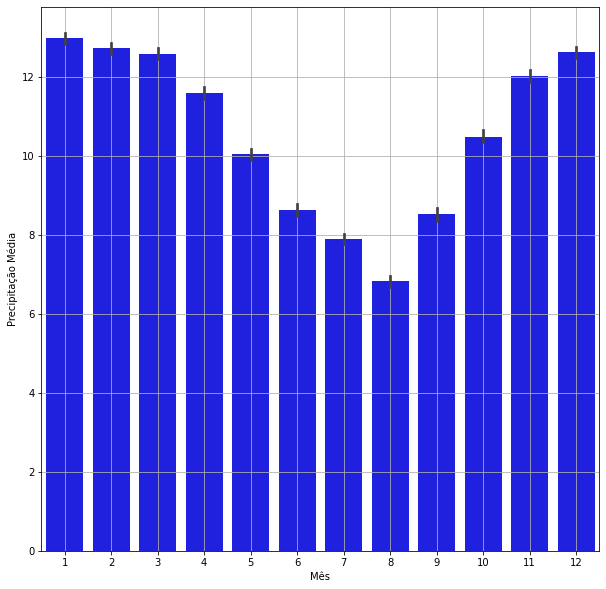

In [23]:
# plotar as médias mensais para a série
plt.figure(figsize=(10,10))
# plt.plot(df_p.groupby('Mes')['Precipitacao'].mean())
sns.barplot(data=df_p, x='Mes', y='Precipitacao', color='blue')
plt.xlabel('Mês')
plt.ylabel('Precipitação Média')
plt.xticks()
plt.grid()

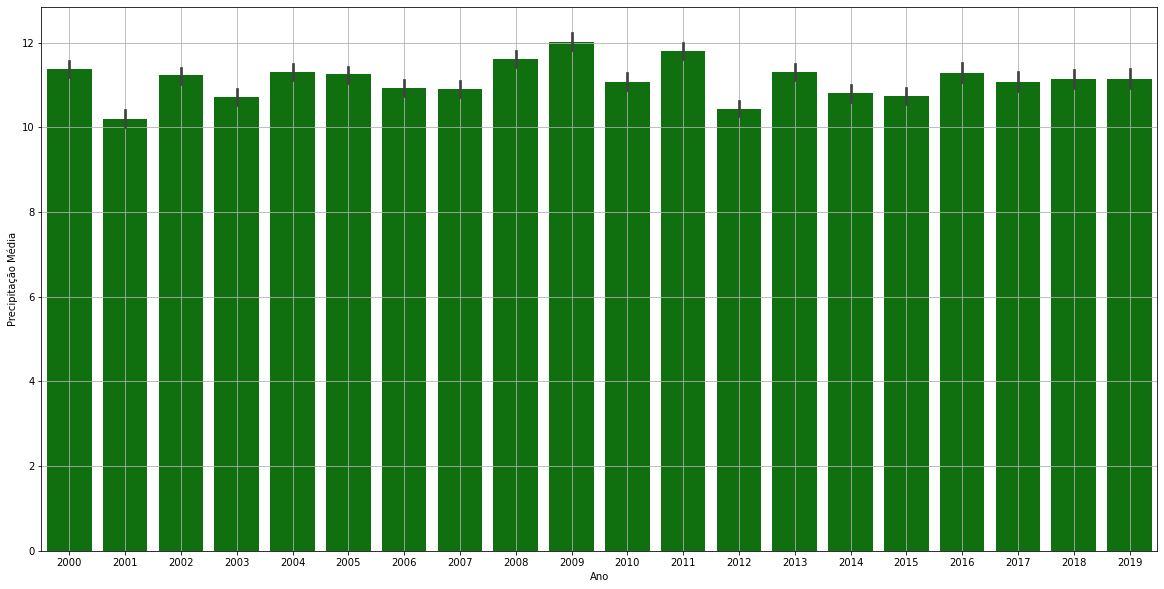

In [24]:
plt.figure(figsize=(20,10))
# plt.plot(df_p.groupby('Mes')['Precipitacao'].mean())
sns.barplot(data=df_p, x='Ano', y='Precipitacao', color='green')
plt.xlabel('Ano')
plt.ylabel('Precipitação Média')
plt.xticks()
plt.grid()

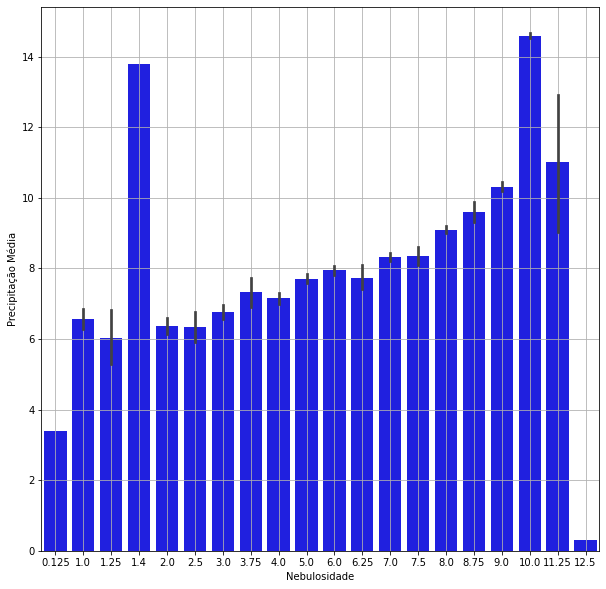

In [25]:
# plotar as médias mensais para a série
plt.figure(figsize=(10,10))
# plt.plot(df_p.groupby('Mes')['Precipitacao'].mean())
sns.barplot(data=df_p, x='Nebulosidade', y='Precipitacao', color='blue')
plt.xlabel('Nebulosidade')
plt.ylabel('Precipitação Média')
plt.xticks()
plt.grid()